# Scrape Tijuana districts

Downloads an electronic map of Tijuana districts from the [Instituto Metropolitano de Planeación de Tijuana](https://www.implantijuana.org/servicios/cartografia/carta-urbana-2010-2030/) website.

In [45]:
import json
import requests
import geopandas as gpd
from esridump.esri2geojson import esri2geojson

In [46]:
r = requests.get("https://www.arcgis.com/sharing/rest/content/items/d6bf69985ebc4f05b3c19741da9f200a/data")

In [47]:
data = r.json()

In [48]:
layers = data['operationalLayers']

In [49]:
dels = [l for l in layers if l['id'] == 'DELEGACIONES_3932'][0]

In [50]:
del_layers = dels['featureCollection']['layers']

In [51]:
del_fset = del_layers[0]['featureSet']

In [52]:
geojson = {
  "type": "FeatureCollection",
  "crs": {
  "type": "name",
  "properties": {
    "name": "epsg:{}".format(data['spatialReference']['wkid'])
    }
  },
  "features": []
}

In [53]:
for feature in del_fset['features']:
  d = esri2geojson(feature)
  d['properties'] = {"name": d['properties']['DELEGACION']}
  geojson['features'].append(d)

In [54]:
json.dump(geojson, open("tj.json", "w"), indent=2)

In [55]:
!ogr2ogr tj.shp -t_srs "EPSG:4326" tj.json -s_srs "EPSG:102100"

In [56]:
df = gpd.read_file("tj.shp")

In [57]:
df.crs

{'init': 'epsg:4326'}

In [58]:
df.to_file("tijuana-districts.json", driver="GeoJSON")

In [61]:
!rm -f *.shp
!rm -f *.dbf
!rm -f *.prj
!rm -f *.shx
!rm -f tj.json

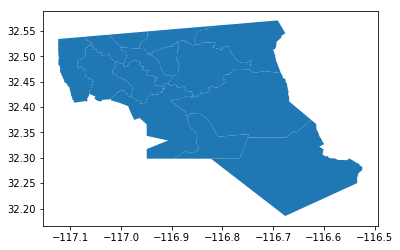

In [60]:
df.plot()